In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import absolute, mean, std
import lightgbm as lgbm
from catboost import CatBoostRegressor

In [99]:
df = pd.read_csv('D:/İndirilenler/gop-data.csv')
df = df.drop(['diğer eğitim Yakınlık', 'Zararlı Alanlara Yakınlık'], axis=1)
df

,Fiyat,Yuzolcumu,Kullanış Tarzı,İnşaat Nevi,Bina Sınıfı,oda sayısı,salon sayısı,Manzara hakimiyeti,Su Elektrik Havagazı,Ön Arka Cephe,Asansör Kalorifer Klima,Müştemilat,İtfaiye Yakınlık,diğer sağlık Yakınlık,üniversite Yakınlık,hastane Yakınlık,metro istasyonları Yakınlık,karakol Yakınlık,AVM Yakınlık
0,780000,57,100,100,75,10,20,75,100,100,100,0,40,20,40,20,20,20,100
1,605000,70,100,100,75,20,20,25,100,100,100,0,60,20,60,20,20,40,40
2,1025000,200,100,100,75,30,40,0,100,100,100,0,60,20,40,20,20,40,60
3,685000,85,100,100,75,20,20,25,100,100,100,0,40,40,60,40,20,40,40
4,330000,95,100,100,75,20,20,25,100,100,100,0,60,20,60,20,20,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1150000,200,100,100,75,40,40,25,100,100,100,0,40,60,40,20,40,20,20
996,1225000,255,100,100,75,40,40,25,100,100,100,0,20,40,0,20,40,20,20
997,390000,85,100,100,75,20,20,25,100,100,100,0,40,60,40,20,40,20,20
998,460000,80,100,100,75,20,20,25,100,100,100,0,40,60,40,20,40,20,20


In [9]:
#SQL SELECT gibi
#df = df.loc[df['n'] == 1]

In [5]:
df.isnull().sum()

Nominal    0
Fiyat      0
dtype: int64

In [6]:
(df == 0).sum()

Nominal    0
Fiyat      0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Fiyat                        1000 non-null   int64
 1   Yuzolcumu                    1000 non-null   int64
 2   Kullanış Tarzı               1000 non-null   int64
 3   İnşaat Nevi                  1000 non-null   int64
 4   Bina Sınıfı                  1000 non-null   int64
 5   oda sayısı                   1000 non-null   int64
 6   salon sayısı                 1000 non-null   int64
 7   Manzara hakimiyeti           1000 non-null   int64
 8   Su Elektrik Havagazı         1000 non-null   int64
 9   Ön Arka Cephe                1000 non-null   int64
 10  Asansör Kalorifer Klima      1000 non-null   int64
 11  Müştemilat                   1000 non-null   int64
 12  İtfaiye Yakınlık             1000 non-null   int64
 13  diğer sağlık Yakınlık        1000 non-null   int6

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nominal,1000.0,4477.244,2023.743367,1445.0,3185.0,3882.0,5046.5,24694.0
Fiyat,1000.0,749418.397,580252.589607,165000.0,400000.0,570000.0,890000.0,4350000.0


In [9]:
from collections import Counter
Counter(df.FLOOR_LEVEL)

Counter({'1': 301228,
         '0': 5035222,
         '2': 166141,
         '3': 63151,
         '4': 23658,
         '5': 11097,
         '-1': 7705,
         '6': 6191,
         '7': 3607,
         '8': 2328,
         '9': 1634,
         '11': 823,
         '16': 241,
         '13': 439,
         '10': 1137,
         '12': 632,
         '14': 368,
         '17': 173,
         '18': 167,
         '21': 528,
         '19': 117,
         '15': 305,
         '20': 130})

In [7]:
df['FLOOR_LEVEL']=df['FLOOR_LEVEL'].astype(str).astype(int)

<AxesSubplot:>

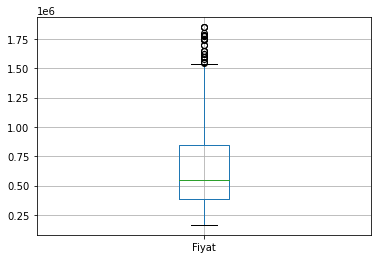

In [35]:
df.boxplot(column='Fiyat')

<AxesSubplot:>

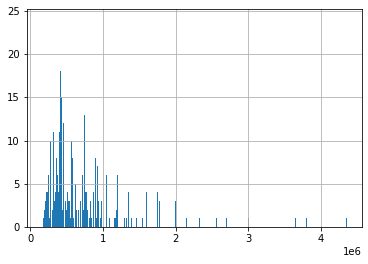

In [11]:
df['Fiyat'].hist(bins = 1000)

<AxesSubplot:>

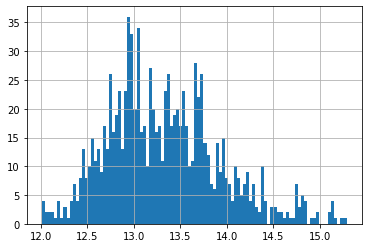

In [13]:
df1 = df
df1['fiyatlog'] = np.log(df['Fiyat'])
df['fiyatlog'].hist(bins = 100)

<AxesSubplot:xlabel='Fiyat', ylabel='Fiyat'>

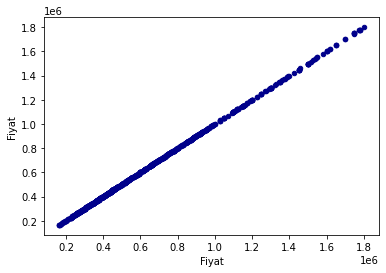

In [37]:
df.plot.scatter(x='Fiyat', y='Fiyat', c='DarkBlue')

In [104]:
df.drop(df[df.Fiyat >= 1850000].index, inplace=True)

In [38]:
len(df)

950

In [105]:
X = df.iloc[:,1:]
y = df.Fiyat


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#X_train= X_train.to_numpy().reshape(-1, 1)
#X_test = X_test.to_numpy().reshape(-1, 1)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.05, random_state=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(760, 18)
(190, 18)
(760,)
(190,)


In [66]:
%%time
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 100 ms


In [67]:
%%time
# make predictions for train data
xgb_y_pred_train = model.predict(X_train)
xgb_train_predictions = [round(value) for value in xgb_y_pred_train]

Wall time: 6.98 ms


In [68]:
xgb_train_r2_score = r2_score(y_train, xgb_y_pred_train)
print("R2 Train Score for XGBoost: {}".format(xgb_train_r2_score))

xgb_train_adj_r2_score = 1 - (1-xgb_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for XGBoost: {}".format(xgb_train_adj_r2_score))

xgb_train_mae = mean_absolute_error(y_train, xgb_y_pred_train)
print("Train MAE for XGBoost: {}".format(xgb_train_mae))

xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_y_pred_train)
print("Train MAPE for XGBoost: {}".format(xgb_train_mape))

xgb_train_mse = mean_squared_error(y_train, xgb_y_pred_train)
xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE for XGBoost: {}".format(xgb_train_rmse))

R2 Train Score for XGBoost: 0.9574306843680155
Train Adjusted R2 Score for XGBoost: 0.9563377622722007
Train MAE for XGBoost: 70501.16681640624
Train MAPE for XGBoost: 0.12351111203760613
Train RMSE for XGBoost: 117229.12888309157


In [69]:
%%time
# make predictions for test data
xgb_y_pred_test = model.predict(X_test)
xgb_test_predictions = [round(value) for value in xgb_y_pred_test]

Wall time: 4.5 ms


In [70]:
xgb_test_r2_score = r2_score(y_test, xgb_y_pred_test)
print("Test R2 Score for XGBoost: {}".format(xgb_test_r2_score))

xgb_test_adj_r2_score = 1 - (1-xgb_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for XGBoost: {}".format(xgb_test_adj_r2_score))

xgb_test_mae = mean_absolute_error(y_test, xgb_y_pred_test)
print("Test MAE for XGBoost: {}".format(xgb_test_mae))

xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_y_pred_test)
print("Test MAPE for XGBoost: {}".format(xgb_test_mape))

xgb_test_mse = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE for XGBoost: {}".format(xgb_test_rmse))

Test R2 Score for XGBoost: 0.5584893307030845
Test Adjusted R2 Score for XGBoost: 0.509158529664323
Test MAE for XGBoost: 230943.73796875
Test MAPE for XGBoost: 0.3982528260697673
Test RMSE for XGBoost: 413539.89981392334


In [106]:
%%time
model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)
print(model2)

RandomForestRegressor(random_state=1)
Wall time: 200 ms


In [107]:
%%time
# make predictions for train data
rf_y_pred_train = model2.predict(X_train)
rf_train_predictions = [round(value) for value in rf_y_pred_train]

Wall time: 26.4 ms


In [108]:
rf_train_r2_score = r2_score(y_train, rf_y_pred_train)
print("Train R2 Score for RandomForest: {}".format(rf_train_r2_score))

rf_train_adj_r2_score = 1 - (1-rf_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest: {}".format(rf_train_adj_r2_score))

rf_train_mae = mean_absolute_error(y_train, rf_y_pred_train)
print("Train MAE for RandomForest: {}".format(rf_train_mae))

rf_train_mape = mean_absolute_percentage_error(y_train, rf_y_pred_train)
print("Train MAPE for RandomForest: {}".format(rf_train_mape))

rf_train_mse = mean_squared_error(y_train, rf_y_pred_train)
rf_train_rmse = np.sqrt(rf_train_mse)
print("Train RMSE for RandomForest: {}".format(rf_train_rmse))

Train R2 Score for RandomForest: 0.8975343576266809
Train Adjusted R2 Score for RandomForest: 0.8950453136823897
Train MAE for RandomForest: 80001.71618875391
Train MAPE for RandomForest: 0.14767420864250203
Train RMSE for RandomForest: 110090.31324831805


In [109]:
%%time
# make predictions for test data
rf_y_pred_test = model2.predict(X_test)
rf_test_predictions = [round(value) for value in rf_y_pred_test]

Wall time: 13.8 ms


In [110]:
rf_test_r2_score = r2_score(y_test, rf_y_pred_test)
print("Test R2 Score for RandomForest: {}".format(rf_test_r2_score))

rf_test_adj_r2_score = 1 - (1-rf_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest: {}".format(rf_test_adj_r2_score))

rf_test_mae = mean_absolute_error(y_test, rf_y_pred_test)
print("Test MAE for RandomForest: {}".format(rf_test_mae))

rf_test_mape = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Test MAPE for RandomForest: {}".format(rf_test_mape))

rf_test_mse = mean_squared_error(y_test, rf_y_pred_test)
rf_test_rmse = np.sqrt(rf_test_mse)
print("Test RMSE for RandomForest: {}".format(rf_test_rmse))

Test R2 Score for RandomForest: 0.524433122495133
Test Adjusted R2 Score for RandomForest: 0.47437345117883123
Test MAE for RandomForest: 179272.4266511195
Test MAPE for RandomForest: 0.34283377299003054
Test RMSE for RandomForest: 248039.98486314


In [24]:
#XGB wtih Gridsearch
model3 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': range(0,500,100)}

In [25]:
xgb_grid = GridSearchCV(model3,
                        parameters,
                        cv = 7,
                        n_jobs = 5,
                        verbose=True)

In [26]:
xgb_grid.fit(X_train, y_train)

Fitting 7 folds for each of 45 candidates, totalling 315 fits
[23:07:52] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:52] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [28]:
model =  xgb_grid.best_estimator_
xgbgrid_y_pred_test = xgb_grid.best_estimator_.predict(X_test)
xgbgrid_test_predictions = [round(value) for value in xgbgrid_y_pred_test]

In [29]:
xgbgrid_test_r2_score = r2_score(y_test, xgbgrid_y_pred_test)
print("Test R2 Score for xgbgrid: {}".format(xgbgrid_test_r2_score))

xgbgrid_test_adj_r2_score = 1 - (1-xgbgrid_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for xgbgrid: {}".format(xgbgrid_test_adj_r2_score))

xgbgrid_test_mae = mean_absolute_error(y_test, xgbgrid_y_pred_test)
print("Test MAE for xgbgrid: {}".format(xgbgrid_test_mae))

xgbgrid_test_mape = mean_absolute_percentage_error(y_test, xgbgrid_y_pred_test)
print("Test MAPE for xgbgrid: {}".format(xgbgrid_test_mape))

xgbgrid_test_mse = mean_squared_error(y_test, xgbgrid_y_pred_test)
xgbgrid_test_rmse = np.sqrt(xgbgrid_test_mse)
print("Test RMSE for xgbgrid: {}".format(xgbgrid_test_rmse))

Test R2 Score for xgbgrid: 0.5348202000671876
Test Adjusted R2 Score for xgbgrid: 0.4822575108092426
Test MAE for xgbgrid: 208755.59793244948
Test MAPE for xgbgrid: 0.3546469829710832
Test RMSE for xgbgrid: 320332.4930573013


In [79]:
%%time
#LightGBM
model4 = lgbm.LGBMRegressor(learning_rate=0.05, n_estimators=1000)
model4.fit(X_train, y_train)
print(model4)

LGBMRegressor(learning_rate=0.05, n_estimators=1000)
Wall time: 352 ms


In [80]:
%%time
# make predictions for train data
lgbm_y_pred_train = model4.predict(X_train)
lgbm_train_predictions = [round(value) for value in lgbm_y_pred_train]

Wall time: 32 ms


In [81]:
lgbm_train_r2_score = r2_score(y_train, lgbm_y_pred_train)
print("Train R2 Score for LightGBM: {}".format(lgbm_train_r2_score))

lgbm_train_adj_r2_score = 1 - (1-lgbm_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LightGBM: {}".format(lgbm_train_adj_r2_score))

lgbm_train_mae = mean_absolute_error(y_train, lgbm_y_pred_train)
print("Train MAE for LightGBM: {}".format(lgbm_train_mae))

#lgbm_train_mbe = np.mean(lgbm_y_pred_train-y_train)
#print("Train MBE for LightGBM: {}".format(lgbm_train_mbe))

lgbm_train_mape = mean_absolute_percentage_error(y_train, lgbm_y_pred_train)
print("Train MAPE for LightGBM: {}".format(lgbm_train_mape))

lgbm_train_mse = mean_squared_error(y_train, lgbm_y_pred_train)
lgbm_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LightGBM: {}".format(lgbm_train_rmse))

Train R2 Score for LightGBM: 0.8921203049389088
Train Adjusted R2 Score for LightGBM: 0.8892006920820458
Train MAE for LightGBM: 83041.50191719609
Train MAPE for LightGBM: 0.1576883574579033
Train RMSE for LightGBM: 112961.33830283799


In [82]:
# make predictions for test data
lgbm_y_pred_test = model4.predict(X_test)
lgbm_test_predictions = [round(value) for value in lgbm_y_pred_test]

In [83]:
lgbm_test_r2_score = r2_score(y_test, lgbm_y_pred_test)
print("Test R2 Score for LightGBM: {}".format(lgbm_test_r2_score))

lgbm_test_adj_r2_score = 1 - (1-lgbm_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LightGBM: {}".format(lgbm_test_adj_r2_score))

lgbm_test_mae = mean_absolute_error(y_test, lgbm_y_pred_test)
print("Test MAE for LightGBM: {}".format(lgbm_test_mae))

#lgbm_test_mbe = np.mean(lgbm_y_pred_test-y_test)
#print("Test MBE for LightGBM: {}".format(lgbm_test_mbe))

lgbm_test_mape = mean_absolute_percentage_error(y_test, lgbm_y_pred_test)
print("Test MAPE for LightGBM: {}".format(lgbm_test_mape))

lgbm_test_mse = mean_squared_error(y_test, lgbm_y_pred_test)
lgbm_test_rmse = np.sqrt(lgbm_test_mse)
print("Test RMSE for LightGBM: {}".format(lgbm_test_rmse))

Test R2 Score for LightGBM: 0.47597095934760736
Test Adjusted R2 Score for LightGBM: 0.41395568826448403
Test MAE for LightGBM: 189397.7235143207
Test MAPE for LightGBM: 0.34751636341225395
Test RMSE for LightGBM: 260371.57750162444


In [111]:
%%time
#CatBoost
model5 = CatBoostRegressor(n_estimators=2000)
model5.fit(X_train, y_train)
print(model5)

Learning rate set to 0.021948
0:	learn: 341063.1194272	total: 1.85ms	remaining: 3.7s
1:	learn: 338480.8947760	total: 2.99ms	remaining: 2.99s
2:	learn: 336122.8984560	total: 3.75ms	remaining: 2.5s
3:	learn: 333570.4691312	total: 5.48ms	remaining: 2.73s
4:	learn: 331214.8654140	total: 6.37ms	remaining: 2.54s
5:	learn: 328717.4696127	total: 8.12ms	remaining: 2.7s
6:	learn: 326304.0318244	total: 8.95ms	remaining: 2.55s
7:	learn: 323871.3933882	total: 9.73ms	remaining: 2.42s
8:	learn: 321634.0400673	total: 12.4ms	remaining: 2.74s
9:	learn: 319535.4287053	total: 14.5ms	remaining: 2.88s
10:	learn: 317372.7490659	total: 15.5ms	remaining: 2.81s
11:	learn: 315400.4981389	total: 16.4ms	remaining: 2.72s
12:	learn: 313266.0443322	total: 17.5ms	remaining: 2.67s
13:	learn: 311422.8186813	total: 18.2ms	remaining: 2.58s
14:	learn: 309745.0550567	total: 19.4ms	remaining: 2.56s
15:	learn: 307941.3423303	total: 20.4ms	remaining: 2.52s
16:	learn: 306326.1997643	total: 21.9ms	remaining: 2.55s
17:	learn: 304

215:	learn: 221085.3528621	total: 318ms	remaining: 2.62s
216:	learn: 220925.3852520	total: 320ms	remaining: 2.63s
217:	learn: 220772.3441248	total: 322ms	remaining: 2.63s
218:	learn: 220658.3338533	total: 323ms	remaining: 2.63s
219:	learn: 220591.6901206	total: 325ms	remaining: 2.63s
220:	learn: 220445.7336861	total: 329ms	remaining: 2.65s
221:	learn: 220280.1091023	total: 331ms	remaining: 2.65s
222:	learn: 220119.4823393	total: 334ms	remaining: 2.66s
223:	learn: 220063.8420023	total: 336ms	remaining: 2.67s
224:	learn: 219883.5898657	total: 339ms	remaining: 2.67s
225:	learn: 219818.1850262	total: 341ms	remaining: 2.68s
226:	learn: 219762.8784025	total: 352ms	remaining: 2.75s
227:	learn: 219650.2999411	total: 354ms	remaining: 2.75s
228:	learn: 219512.0603513	total: 355ms	remaining: 2.74s
229:	learn: 219404.7445616	total: 356ms	remaining: 2.74s
230:	learn: 219350.1380083	total: 359ms	remaining: 2.75s
231:	learn: 219202.0968080	total: 360ms	remaining: 2.75s
232:	learn: 219009.7979069	tota

391:	learn: 203801.4727025	total: 813ms	remaining: 3.34s
392:	learn: 203768.3610109	total: 818ms	remaining: 3.35s
393:	learn: 203755.5385695	total: 822ms	remaining: 3.35s
394:	learn: 203655.8708475	total: 824ms	remaining: 3.35s
395:	learn: 203630.1952528	total: 826ms	remaining: 3.34s
396:	learn: 203531.4734604	total: 827ms	remaining: 3.34s
397:	learn: 203423.2531308	total: 829ms	remaining: 3.34s
398:	learn: 203321.1425014	total: 831ms	remaining: 3.33s
399:	learn: 203301.0554161	total: 833ms	remaining: 3.33s
400:	learn: 203255.4498269	total: 834ms	remaining: 3.33s
401:	learn: 203132.9639371	total: 836ms	remaining: 3.32s
402:	learn: 203056.1853603	total: 838ms	remaining: 3.32s
403:	learn: 202967.2991701	total: 840ms	remaining: 3.32s
404:	learn: 202926.0649477	total: 841ms	remaining: 3.31s
405:	learn: 202820.1949282	total: 842ms	remaining: 3.3s
406:	learn: 202727.6685910	total: 843ms	remaining: 3.3s
407:	learn: 202604.6984600	total: 844ms	remaining: 3.29s
408:	learn: 202556.8248583	total:

582:	learn: 190085.1729849	total: 1.13s	remaining: 2.75s
583:	learn: 189969.2378234	total: 1.13s	remaining: 2.75s
584:	learn: 189868.8299009	total: 1.14s	remaining: 2.75s
585:	learn: 189863.5320126	total: 1.14s	remaining: 2.75s
586:	learn: 189775.1713437	total: 1.14s	remaining: 2.75s
587:	learn: 189657.8805813	total: 1.14s	remaining: 2.74s
588:	learn: 189604.5604460	total: 1.14s	remaining: 2.74s
589:	learn: 189543.9579984	total: 1.15s	remaining: 2.74s
590:	learn: 189535.7541596	total: 1.15s	remaining: 2.74s
591:	learn: 189454.1414112	total: 1.15s	remaining: 2.74s
592:	learn: 189447.7731533	total: 1.15s	remaining: 2.73s
593:	learn: 189443.9928638	total: 1.15s	remaining: 2.73s
594:	learn: 189436.0551114	total: 1.16s	remaining: 2.73s
595:	learn: 189426.7074383	total: 1.16s	remaining: 2.73s
596:	learn: 189350.8588223	total: 1.16s	remaining: 2.72s
597:	learn: 189269.3686721	total: 1.16s	remaining: 2.72s
598:	learn: 189264.5678960	total: 1.16s	remaining: 2.72s
599:	learn: 189220.3872058	tota

759:	learn: 180064.5729157	total: 1.46s	remaining: 2.39s
760:	learn: 179971.9376308	total: 1.46s	remaining: 2.38s
761:	learn: 179880.5205195	total: 1.47s	remaining: 2.38s
762:	learn: 179874.3540188	total: 1.47s	remaining: 2.38s
763:	learn: 179847.0505709	total: 1.47s	remaining: 2.38s
764:	learn: 179800.0747563	total: 1.47s	remaining: 2.38s
765:	learn: 179753.8241549	total: 1.48s	remaining: 2.38s
766:	learn: 179687.0844282	total: 1.48s	remaining: 2.38s
767:	learn: 179605.4183836	total: 1.48s	remaining: 2.38s
768:	learn: 179584.9404370	total: 1.48s	remaining: 2.37s
769:	learn: 179519.5091499	total: 1.48s	remaining: 2.37s
770:	learn: 179508.7987406	total: 1.49s	remaining: 2.37s
771:	learn: 179418.7193507	total: 1.49s	remaining: 2.37s
772:	learn: 179314.0135382	total: 1.49s	remaining: 2.37s
773:	learn: 179236.0634157	total: 1.49s	remaining: 2.36s
774:	learn: 179135.6940917	total: 1.5s	remaining: 2.36s
775:	learn: 179131.6289882	total: 1.5s	remaining: 2.36s
776:	learn: 179078.8183295	total:

951:	learn: 170737.8189614	total: 1.97s	remaining: 2.17s
952:	learn: 170694.6550342	total: 1.97s	remaining: 2.16s
953:	learn: 170664.3205705	total: 1.97s	remaining: 2.16s
954:	learn: 170632.7988937	total: 1.97s	remaining: 2.16s
955:	learn: 170631.1083969	total: 1.98s	remaining: 2.16s
956:	learn: 170561.8623281	total: 1.98s	remaining: 2.16s
957:	learn: 170521.3490646	total: 1.98s	remaining: 2.15s
958:	learn: 170452.8391008	total: 1.98s	remaining: 2.15s
959:	learn: 170436.7640342	total: 1.99s	remaining: 2.15s
960:	learn: 170376.7693406	total: 1.99s	remaining: 2.15s
961:	learn: 170323.3453055	total: 1.99s	remaining: 2.15s
962:	learn: 170304.8503302	total: 1.99s	remaining: 2.15s
963:	learn: 170302.8115764	total: 1.99s	remaining: 2.14s
964:	learn: 170263.4141195	total: 2s	remaining: 2.14s
965:	learn: 170261.7762987	total: 2s	remaining: 2.14s
966:	learn: 170259.8367492	total: 2s	remaining: 2.14s
967:	learn: 170218.4367772	total: 2s	remaining: 2.13s
968:	learn: 170216.1548854	total: 2s	remain

1107:	learn: 164128.1340702	total: 2.3s	remaining: 1.85s
1108:	learn: 164084.6327407	total: 2.3s	remaining: 1.85s
1109:	learn: 164082.8984848	total: 2.3s	remaining: 1.84s
1110:	learn: 164029.8460169	total: 2.3s	remaining: 1.84s
1111:	learn: 163990.1344713	total: 2.3s	remaining: 1.84s
1112:	learn: 163891.4058432	total: 2.31s	remaining: 1.84s
1113:	learn: 163812.5966808	total: 2.31s	remaining: 1.83s
1114:	learn: 163785.4357337	total: 2.31s	remaining: 1.83s
1115:	learn: 163784.2755627	total: 2.31s	remaining: 1.83s
1116:	learn: 163782.2789532	total: 2.31s	remaining: 1.83s
1117:	learn: 163745.9537094	total: 2.31s	remaining: 1.82s
1118:	learn: 163744.5190820	total: 2.31s	remaining: 1.82s
1119:	learn: 163736.6475722	total: 2.32s	remaining: 1.82s
1120:	learn: 163693.5385823	total: 2.32s	remaining: 1.82s
1121:	learn: 163689.7654793	total: 2.32s	remaining: 1.81s
1122:	learn: 163643.2179568	total: 2.32s	remaining: 1.81s
1123:	learn: 163587.6335134	total: 2.32s	remaining: 1.81s
1124:	learn: 163520

1300:	learn: 156412.9720846	total: 2.63s	remaining: 1.41s
1301:	learn: 156393.7396468	total: 2.63s	remaining: 1.41s
1302:	learn: 156361.2017982	total: 2.64s	remaining: 1.41s
1303:	learn: 156338.9313232	total: 2.64s	remaining: 1.41s
1304:	learn: 156312.6114525	total: 2.65s	remaining: 1.41s
1305:	learn: 156280.9457790	total: 2.65s	remaining: 1.41s
1306:	learn: 156218.5561293	total: 2.65s	remaining: 1.41s
1307:	learn: 156165.3253153	total: 2.65s	remaining: 1.4s
1308:	learn: 156163.8205968	total: 2.67s	remaining: 1.41s
1309:	learn: 156162.8405666	total: 2.67s	remaining: 1.41s
1310:	learn: 156126.2097598	total: 2.68s	remaining: 1.41s
1311:	learn: 156102.4087071	total: 2.68s	remaining: 1.4s
1312:	learn: 156056.0458648	total: 2.68s	remaining: 1.4s
1313:	learn: 156029.7072064	total: 2.69s	remaining: 1.4s
1314:	learn: 155946.4332455	total: 2.69s	remaining: 1.4s
1315:	learn: 155892.6675354	total: 2.69s	remaining: 1.4s
1316:	learn: 155842.5425646	total: 2.69s	remaining: 1.4s
1317:	learn: 155818.2

1482:	learn: 150014.5665659	total: 3.14s	remaining: 1.09s
1483:	learn: 149978.0940874	total: 3.14s	remaining: 1.09s
1484:	learn: 149977.1076905	total: 3.15s	remaining: 1.09s
1485:	learn: 149932.4404670	total: 3.15s	remaining: 1.09s
1486:	learn: 149876.1776109	total: 3.15s	remaining: 1.09s
1487:	learn: 149802.6367630	total: 3.16s	remaining: 1.09s
1488:	learn: 149766.8371704	total: 3.16s	remaining: 1.08s
1489:	learn: 149747.8882145	total: 3.16s	remaining: 1.08s
1490:	learn: 149715.0231512	total: 3.17s	remaining: 1.08s
1491:	learn: 149690.6229575	total: 3.17s	remaining: 1.08s
1492:	learn: 149642.6314217	total: 3.17s	remaining: 1.08s
1493:	learn: 149641.5419763	total: 3.18s	remaining: 1.08s
1494:	learn: 149603.5679722	total: 3.18s	remaining: 1.07s
1495:	learn: 149602.6004844	total: 3.18s	remaining: 1.07s
1496:	learn: 149577.1420044	total: 3.19s	remaining: 1.07s
1497:	learn: 149575.7733618	total: 3.19s	remaining: 1.07s
1498:	learn: 149516.0273741	total: 3.19s	remaining: 1.07s
1499:	learn: 1

1631:	learn: 145146.8709559	total: 3.64s	remaining: 820ms
1632:	learn: 145135.7374557	total: 3.64s	remaining: 818ms
1633:	learn: 145117.5881118	total: 3.64s	remaining: 816ms
1634:	learn: 145059.2158663	total: 3.65s	remaining: 814ms
1635:	learn: 145047.4844172	total: 3.65s	remaining: 812ms
1636:	learn: 145029.7846371	total: 3.65s	remaining: 810ms
1637:	learn: 145029.0943496	total: 3.65s	remaining: 808ms
1638:	learn: 144989.8892783	total: 3.66s	remaining: 806ms
1639:	learn: 144970.9646466	total: 3.66s	remaining: 804ms
1640:	learn: 144917.3691702	total: 3.66s	remaining: 802ms
1641:	learn: 144877.4931105	total: 3.67s	remaining: 799ms
1642:	learn: 144858.7375389	total: 3.67s	remaining: 797ms
1643:	learn: 144818.7438058	total: 3.67s	remaining: 795ms
1644:	learn: 144785.9117934	total: 3.67s	remaining: 793ms
1645:	learn: 144766.0474321	total: 3.68s	remaining: 791ms
1646:	learn: 144765.2472194	total: 3.68s	remaining: 789ms
1647:	learn: 144743.8473445	total: 3.69s	remaining: 787ms
1648:	learn: 1

1807:	learn: 140124.4721078	total: 4.14s	remaining: 440ms
1808:	learn: 140092.0521420	total: 4.14s	remaining: 438ms
1809:	learn: 140065.6520111	total: 4.15s	remaining: 435ms
1810:	learn: 140040.0309620	total: 4.15s	remaining: 433ms
1811:	learn: 140029.1526462	total: 4.15s	remaining: 431ms
1812:	learn: 140010.8268892	total: 4.15s	remaining: 428ms
1813:	learn: 139989.2663850	total: 4.15s	remaining: 426ms
1814:	learn: 139971.1062551	total: 4.16s	remaining: 424ms
1815:	learn: 139947.9873241	total: 4.16s	remaining: 422ms
1816:	learn: 139921.1310149	total: 4.16s	remaining: 419ms
1817:	learn: 139920.4741468	total: 4.17s	remaining: 417ms
1818:	learn: 139892.5545085	total: 4.17s	remaining: 415ms
1819:	learn: 139856.4126384	total: 4.17s	remaining: 412ms
1820:	learn: 139824.2773892	total: 4.17s	remaining: 410ms
1821:	learn: 139798.3741550	total: 4.17s	remaining: 408ms
1822:	learn: 139775.3577131	total: 4.18s	remaining: 406ms
1823:	learn: 139774.5194057	total: 4.18s	remaining: 403ms
1824:	learn: 1

1999:	learn: 135967.9729478	total: 4.64s	remaining: 0us
Wall time: 5.35 s


In [112]:
%%time
# make predictions for train data
catboost_y_pred_train = model5.predict(X_train)
catboost_train_predictions = [round(value) for value in catboost_y_pred_train]

Wall time: 7.89 ms


In [113]:
catboost_train_r2_score = r2_score(y_train, catboost_y_pred_train)
print("R2 Train Score for CatBoost: {}".format(catboost_train_r2_score))

catboost_train_adj_r2_score = 1 - (1-catboost_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for CatBoost: {}".format(catboost_train_adj_r2_score))

catboost_train_mae = mean_absolute_error(y_train, catboost_y_pred_train)
print("Train MAE for CatBoost: {}".format(catboost_train_mae))

catboost_train_mape = mean_absolute_percentage_error(y_train, catboost_y_pred_train)
print("Train MAPE for CatBoost: {}".format(catboost_train_mape))

catboost_train_mse = mean_squared_error(y_train, catboost_y_pred_train)
catboost_train_rmse = np.sqrt(catboost_train_mse)
print("Train RMSE for CatBoost: {}".format(catboost_train_rmse))

R2 Train Score for CatBoost: 0.8437020441369791
Train Adjusted R2 Score for CatBoost: 0.8399053326585252
Train MAE for CatBoost: 99528.61911230342
Train MAPE for CatBoost: 0.19046699965530303
Train RMSE for CatBoost: 135967.97294782015


In [114]:
# make predictions for test data
catboost_y_pred_test = model5.predict(X_test)
catboost_test_predictions = [round(value) for value in catboost_y_pred_test]

In [115]:
catboost_test_r2_score = r2_score(y_test, catboost_y_pred_test)
print("Test R2 Score for CatBoost: {}".format(catboost_test_r2_score))

catboost_test_adj_r2_score = 1 - (1-catboost_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for CatBoost: {}".format(catboost_test_adj_r2_score))

catboost_test_mae = mean_absolute_error(y_test, catboost_y_pred_test)
print("Test MAE for CatBoost: {}".format(catboost_test_mae))

catboost_test_mape = mean_absolute_percentage_error(y_test, catboost_y_pred_test)
print("Test MAPE for CatBoost: {}".format(catboost_test_mape))

catboost_test_mse = mean_squared_error(y_test, catboost_y_pred_test)
catboost_test_rmse = np.sqrt(catboost_test_mse)
print("Test RMSE for CatBoost: {}".format(catboost_test_rmse))

Test R2 Score for CatBoost: 0.5436601978380526
Test Adjusted R2 Score for CatBoost: 0.4956244291894266
Test MAE for CatBoost: 176047.63343569677
Test MAPE for CatBoost: 0.3365626988644153
Test RMSE for CatBoost: 242974.1500171278


In [ ]:
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test = scaler.transform(X_test)

In [16]:
%%time
#LinearRegression
model6 = LinearRegression()
model6.fit(X_train, y_train)
print(model6)

LinearRegression()
Wall time: 120 ms


In [19]:
%%time
# make predictions for train data
lin_y_pred_train = model6.predict(X_train)
lin_train_predictions = lin_y_pred_train

Wall time: 3.99 ms


In [20]:
lin_train_r2_score = r2_score(y_train, lin_y_pred_train)
print("Train R2 Score for LinearRegression: {}".format(lin_train_r2_score))

lin_train_adj_r2_score = 1 - (1-lin_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LinearRegression: {}".format(lin_train_adj_r2_score))

lin_train_mae = mean_absolute_error(y_train, lin_y_pred_train)
print("Train MAE for LinearRegression: {}".format(lin_train_mae))

lin_train_mape = mean_absolute_percentage_error(y_train, lin_y_pred_train)
print("Train MAPE for LinearRegression: {}".format(lin_train_mape))

lin_train_mse = mean_squared_error(y_train, lin_y_pred_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("Train RMSE for LinearRegression: {}".format(lin_train_rmse))

Train R2 Score for LinearRegression: 0.43377084914193964
Train Adjusted R2 Score for LinearRegression: 0.41902529833834434
Train MAE for LinearRegression: 246616.1935225617
Train MAPE for LinearRegression: 0.40503207378792494
Train RMSE for LinearRegression: 360728.2915949742


In [22]:
# make predictions for test data
lin_y_pred_test = model6.predict(X_test)
lin_test_predictions = lin_y_pred_test

In [23]:
lin_test_r2_score = r2_score(y_test, lin_y_pred_test)
print("Test R2 Score for LinearRegression: {}".format(lin_test_r2_score))

lin_test_adj_r2_score = 1 - (1-lin_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LinearRegression: {}".format(lin_test_adj_r2_score))

lin_test_mae = mean_absolute_error(y_test, lin_y_pred_test)
print("Test MAE for LinearRegression: {}".format(lin_test_mae))

lin_test_mape = mean_absolute_percentage_error(y_test, lin_y_pred_test)
print("Test MAPE for LinearRegression: {}".format(lin_test_mape))

lin_test_mse = mean_squared_error(y_test, lin_y_pred_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("Test RMSE for LinearRegression: {}".format(lin_test_rmse))

Test R2 Score for LinearRegression: 0.4207740040869624
Test Adjusted R2 Score for LinearRegression: 0.355324739012043
Test MAE for LinearRegression: 240422.3299034188
Test MAPE for LinearRegression: 0.42530913871130976
Test RMSE for LinearRegression: 357449.41647210554


In [13]:
importance = pd.DataFrame({"Importance": model2.feature_importances_},
                         index=X.columns)

In [14]:
importance

,Importance
Yuzolcumu,0.252937
Kullanış Tarzı,0.000000
İnşaat Nevi,0.000000
Bina Sınıfı,0.000000
oda sayısı,0.139846
salon sayısı,0.007893
Manzara hakimiyeti,0.301090
Su Elektrik Havagazı,0.000000
Ön Arka Cephe,0.000000
Asansör Kalorifer Klima,0.000000


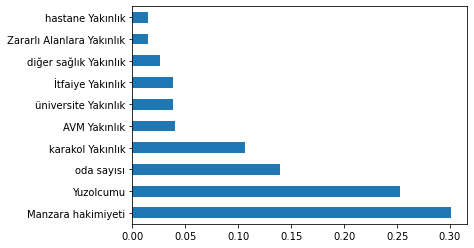

In [15]:
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
fig= ax.figure
#fig.set_size_inches(9, 4)
#fig.savefig('C:/Users/METE/Pictures/MLPPD/featureimplast2.png', format='png', dpi=1200)

In [58]:
#pip install shap

Note: you may need to restart the kernel to use updated packages.


Wall time: 0 ns


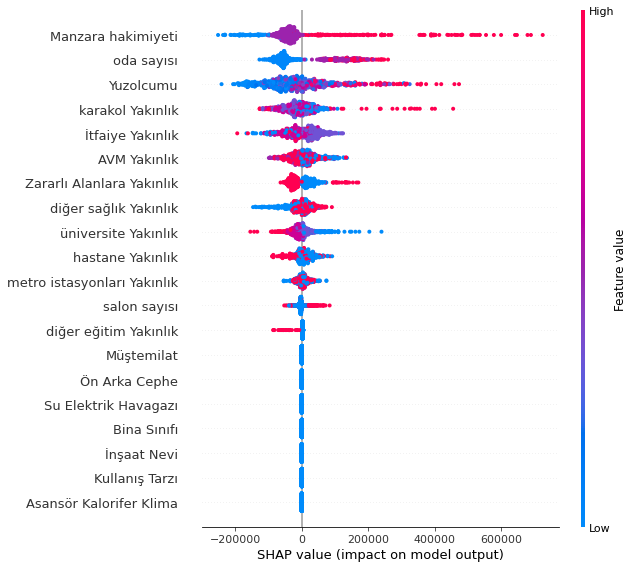

In [84]:
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, samples)

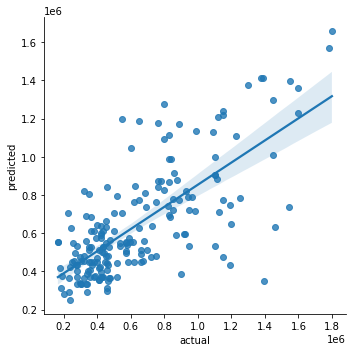

In [76]:
df5 = pd.DataFrame(data = {
    'actual':y_test, 
    'predicted':rf_y_pred_test
    })

ax = sns.lmplot(x='actual', y='predicted', data = df5)
fig= ax.figure
#fig.savefig('C:/Users/METE/Pictures/MLPPD/actualpredicted.png', format='png', dpi=1200)

In [77]:
X = df5.iloc[:, :-1].values # feature
y = df5.iloc[:, -1].values # label

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.526757403684646
Coefficient: [0.57916049]
Intercept: 274859.79042301484


In [78]:
df5
#df5.to_csv('D:/İndirilenler/actual_and_predicted.csv')

,actual,predicted
488,305000,3.364600e+05
544,830000,6.951500e+05
974,590000,5.768100e+05
869,355000,4.068600e+05
763,1150000,4.742033e+05
...,...,...
642,1300000,1.375792e+06
796,1390000,1.414300e+06
494,420000,6.004100e+05
432,365000,6.138693e+05
